In [ ]:
## SADIYA RASOOL - 20MID0190 - VIT VELLORE

# Importing the libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split

# Loading the dataset

In [19]:
df = pd.read_csv("C:\\Users\\sadiy\\Downloads\\Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [20]:
df.shape

(545, 13)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


# Handling Missing values

In [22]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [23]:
# no missing values

# Visualizations



> Univariate Analysis



C:\Users\sadiy\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price Distribution plot')

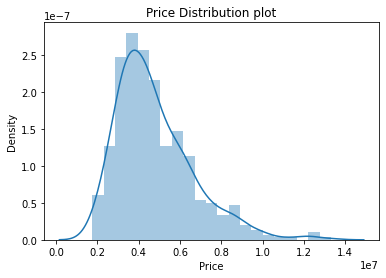

In [24]:
sns.distplot(df['price'])
plt.xlabel("Price")
plt.title("Price Distribution plot")

([<matplotlib.patches.Wedge at 0x24967537ca0>,
 [Text(-0.6022016005293036, 0.9205179152628944, 'AC Houses'),
  Text(0.6022016005293035, -0.9205179152628945, 'Non AC Houses')],
 [Text(-0.32847360028871103, 0.5021006810524877, '68.44%'),
  Text(0.3284736002887109, -0.5021006810524878, '31.56%')])

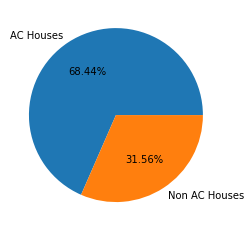

In [25]:
plt.pie(df['airconditioning'].value_counts(),labels=['AC Houses','Non AC Houses'],autopct="%.2f%%")

# Nowadays AC is a very much needed thing so probably house with AC has more prices let's check in bar plot



> Bivariate Analysis



<BarContainer object of 545 artists>

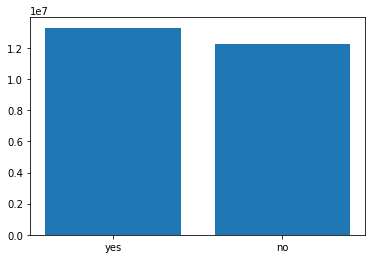

In [26]:
plt.bar(df['airconditioning'],df['price']) 

<BarContainer object of 545 artists>

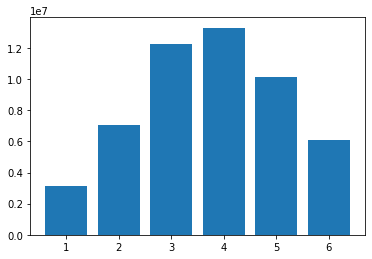

In [27]:
plt.bar(df['bedrooms'],df['price']) # Here the highest price is for 4 beds then its decreasing for 6 beds

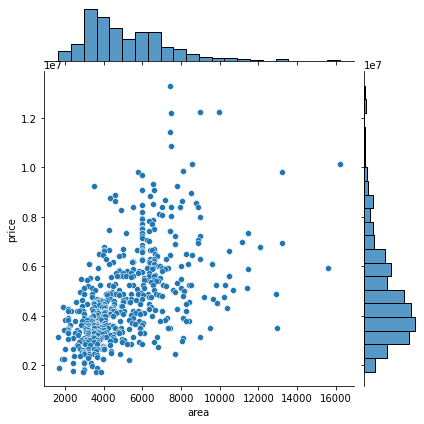

In [28]:
sns.jointplot(data=df,x='area',y='price')

#If area of house is 6000 to 12000 we have high prices after thean 



> Multivariate Analysis



In [29]:
corr_df = pd.read_csv("C:\\Users\\sadiy\\Downloads\\Housing.csv")
LE = LabelEncoder()
a = corr_df.iloc[:,[5,6,7,8,9,11]]

for column in a:
    corr_df[column] = LE.fit_transform(corr_df[column])

#Duplicate dataset to apply encoding and find correlation

<AxesSubplot:>

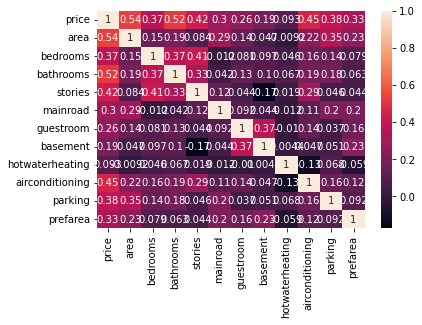

In [30]:
sns.heatmap(corr_df.corr(),annot=True)

# Here I performed encoding to find the correlation of the categorical variables too with the price
# We found out that area>bathrooms>ac>stories are the correlation order for price so these variable are a important one 

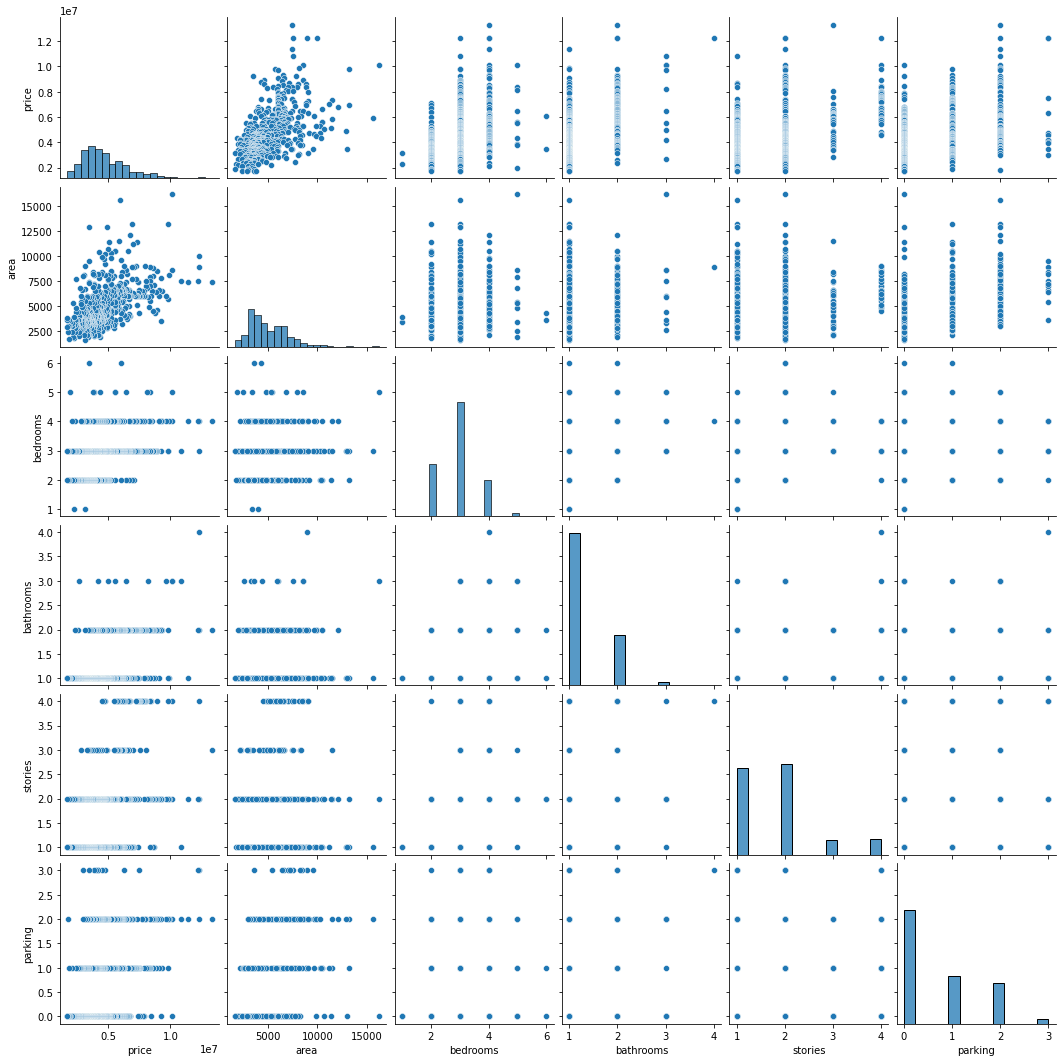

In [31]:
sns.pairplot(df)

# 4 bedrooms have high price and no bedrooms and 6 bedrooms have low price
# 2 bathrooms have high price and we can't find the lower price because every number has equal prices
# 2 and 4 stories have high price even though we have a high price for 3 story but its an outlier and low price for 1 story
# 2 parking space have high price and no parking space has low price

# Descriptive Statistics

We'll take only the numerical columns for the descriptive analysis for some functions so we'll create a new dataframe named df1 containg only numerical columns

In [32]:
df1 = df.iloc[:,[0,1,2,3,4,10]]
df1.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


In [33]:
df1.mean()

price        4.766729e+06
area         5.150541e+03
bedrooms     2.965138e+00
bathrooms    1.286239e+00
stories      1.805505e+00
parking      6.935780e-01
dtype: float64

In [34]:
df1.median()

price        4340000.0
area            4600.0
bedrooms           3.0
bathrooms          1.0
stories            2.0
parking            0.0
dtype: float64

In [35]:
df.mode()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,3500000,6000.0,3.0,1.0,2.0,yes,no,no,no,no,0.0,no,semi-furnished
1,4200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df.max()

price                  13300000
area                      16200
bedrooms                      6
bathrooms                     4
stories                       4
mainroad                    yes
guestroom                   yes
basement                    yes
hotwaterheating             yes
airconditioning             yes
parking                       3
prefarea                    yes
furnishingstatus    unfurnished
dtype: object

In [37]:
df.min()

price                 1750000
area                     1650
bedrooms                    1
bathrooms                   1
stories                     1
mainroad                   no
guestroom                  no
basement                   no
hotwaterheating            no
airconditioning            no
parking                     0
prefarea                   no
furnishingstatus    furnished
dtype: object

In [38]:
df.var()

C:\Users\sadiy\AppData\Local\Temp\ipykernel_1840\1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


price        3.498544e+12
area         4.709512e+06
bedrooms     5.447383e-01
bathrooms    2.524757e-01
stories      7.525432e-01
parking      7.423300e-01
dtype: float64

In [39]:
df.std()

C:\Users\sadiy\AppData\Local\Temp\ipykernel_1840\3390915376.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


price        1.870440e+06
area         2.170141e+03
bedrooms     7.380639e-01
bathrooms    5.024696e-01
stories      8.674925e-01
parking      8.615858e-01
dtype: float64

In [40]:
quantile = df1.quantile(q=[0.25,0.75])
quantile

,price,area,bedrooms,bathrooms,stories,parking
0.25,3430000.0,3600.0,2.0,1.0,1.0,0.0
0.75,5740000.0,6360.0,3.0,2.0,2.0,1.0


In [41]:
IQR = quantile.iloc[1]-quantile.iloc[0]
upper_extreme = quantile.iloc[1]+(1.5*IQR)
upper_extreme

price        9205000.0
area           10500.0
bedrooms           4.5
bathrooms          3.5
stories            3.5
parking            2.5
dtype: float64

In [42]:
lower_extreme = quantile.iloc[0]-(1.5*IQR)
lower_extreme

price       -35000.0
area          -540.0
bedrooms         0.5
bathrooms       -0.5
stories         -0.5
parking         -1.5
dtype: float64

In [43]:
df.skew()

C:\Users\sadiy\AppData\Local\Temp\ipykernel_1840\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


price        1.212239
area         1.321188
bedrooms     0.495684
bathrooms    1.589264
stories      1.082088
parking      0.842062
dtype: float64

In [44]:
df.kurt()

C:\Users\sadiy\AppData\Local\Temp\ipykernel_1840\1257127604.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


price        1.960130
area         2.751480
bedrooms     0.728323
bathrooms    2.164856
stories      0.679404
parking     -0.573063
dtype: float64

In [45]:
corr_df.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382


In [46]:
df['bathrooms'].value_counts()

1    401
2    133
3     10
4      1
Name: bathrooms, dtype: int64

In [47]:
df['parking'].value_counts()

0    299
1    126
2    108
3     12
Name: parking, dtype: int64

# Outliers

In [48]:
sns.boxplot(df)

C:\Users\sadiy\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
for column in ['price','area']:
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3-Q1
  l_e = Q1 - (1.5*IQR)
  u_e = Q1 + (1.5*IQR)
  df[column] = np.where(df[column]>u_e,u_e,np.where(df[column]<l_e,l_e,df[column]))

# Removing outliers only for area and price 

In [ ]:
sns.boxplot(df) # Outliers on Area and Price removed

# Encoding

In [ ]:
LE = LabelEncoder()
xf = df.iloc[:,[5,6,7,8,9,11]].columns
for column in xf:
  df[column] = LE.fit_transform(df[column])
df

In [ ]:
df.info() #no more object dtype

# Split the data into dependent and independent variable

In [ ]:
x = df.iloc[:,1:].values  # Except 1st column (all columns except price)
y = df.iloc[:,0].values   # Only 1st column (only price)

In [ ]:
x

In [ ]:
y

# Train Test Split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
x_train.shape

In [ ]:
x_test.shape

In [ ]:
y_train.shape

In [ ]:
y_test.shape

In [ ]:
x_train

In [ ]:
x_test

In [ ]:
y_train

In [ ]:
y_test

# Feature Scaling

In [ ]:
SS = StandardScaler()
x_train = SS.fit_transform(x_train)
x_test = SS.fit_transform(x_test)

In [ ]:
x_train 

In [ ]:
x_test

# Model Building

Our target varible is a numeric one so we shall do the regression here I have tried all the regression models namely


1.   Multilinear Regression
2.   Polynomial Regression
3.   Support Vector Regression
4.   Decision Tree Regression
5.   Random Forest Regression
6.   Lasso Regression
7.   Ridge Regression





> # Linear Regression



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
LR = LinearRegression()
LR.fit(x_train,y_train)

In [ ]:
y_predMLR = LR.predict(x_test)

In [ ]:
r2_score(y_test,y_predMLR) 


> # Polynomial Regression



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
PF = PolynomialFeatures(degree=4)
x_poly = PF.fit_transform(x_train)
x_poly

In [ ]:
LR1 = LinearRegression()
LR1.fit(x_poly,y_train)

In [ ]:
y_predPR = LR1.predict(PF.fit_transform(x_test))

In [ ]:
r2_score(y_test,y_predPR) # Worst score



> # Support Vector Regression


In [ ]:
from sklearn.svm import SVR
SV = SVR(kernel='rbf') # Let's use gaussian radial basis function
SV.fit(x_train,y_train)

In [ ]:
y_predSVR = SV.predict(x_test)

In [ ]:
r2_score(y_test,y_predSVR)  # Worst Model



> # Decision Tree Regression



In [ ]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(criterion='squared_error',random_state=0)
DTR.fit(x_train,y_train)

In [ ]:
y_predDTR = DTR.predict(x_test)

In [ ]:
r2_score(y_test,y_predDTR)

> # Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=100,random_state=0)

In [ ]:
RFR.fit(x_train,y_train)

In [ ]:
y_predRFR = RFR.predict(x_test)

In [ ]:
r2_score(y_test,y_predRFR)


> # Lasso Regression



In [ ]:
from sklearn.linear_model import Lasso
L = Lasso()
L.fit(x_train,y_train)

In [ ]:
y_predL = L.predict(x_test)

In [ ]:
r2_score(y_test,y_predL)



> # Ridge Regression



In [ ]:
from sklearn.linear_model import Ridge
R = Ridge()

In [ ]:
R.fit(x_train,y_train)

In [ ]:
y_predR = R.predict(x_test)

In [ ]:
np.set_printoptions(precision=2)
print(np.concatenate((y_predR.reshape(len(y_predR),1), y_test.reshape(len(y_test),1)),1))

#Comparison of our predicted value with original value side by side

In [ ]:
r2_score(y_test,y_predR)

R^2 Summary:

Multilinear Regression    : 0.6542

Polynomial Regression     : -8.013

Support Vector Regression : -0.021

Decision Tree Regression  : 0.5559

Random Forest Regression  : 0.6033

Lasso Regression          : 0.6542

Ridge Regression          : 0.6543

In [ ]:
R.predict(SS.fit_transform([[8000,3,3,2,1,1,1,1,1,2,0]]))

# Here we are predicting the price for a house of area 8000 and has 4 bedrooms and has 2 bathrooms and has 2 stories and its in mainroad and it has a guestroom and a basement too with hotwater heating and AC capabilities and has 2 parking slots and it has fully furnished furnitures 
# The house price is ₹45,67,443

# Model Evaluation

In [ ]:
from sklearn import metrics

print(metrics.mean_squared_error(y_test,y_predR))
print(np.sqrt(metrics.mean_squared_error(y_test,y_predR)))
print(metrics.r2_score(y_test,y_predR))